Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "MUHAMMAD ABDURREHMAN ASIF"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [24]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    new = applicants[0]       #starting with the first
    total = 1                 #assuming we have 1 assistant at least
    for i in applicants[1:]:  #goes over the entire applicant pool
        if i > new:           #if a better applicant comes
            new = i           #they are hired
            total += 1        #total hires goes up
            
    return total

hire_assistant([1,-2,-6])

1

In [16]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [37]:
import random
import numpy as np
def experimental_hires(N):
    total = 100
    average = []
    
    for i in range(total):
        
        applicants = random.sample(range(N), N)
        
        average.append(hire_assistant(applicants))
        
    return np.mean(average)

experimental_hires(10000)


10.2

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [40]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

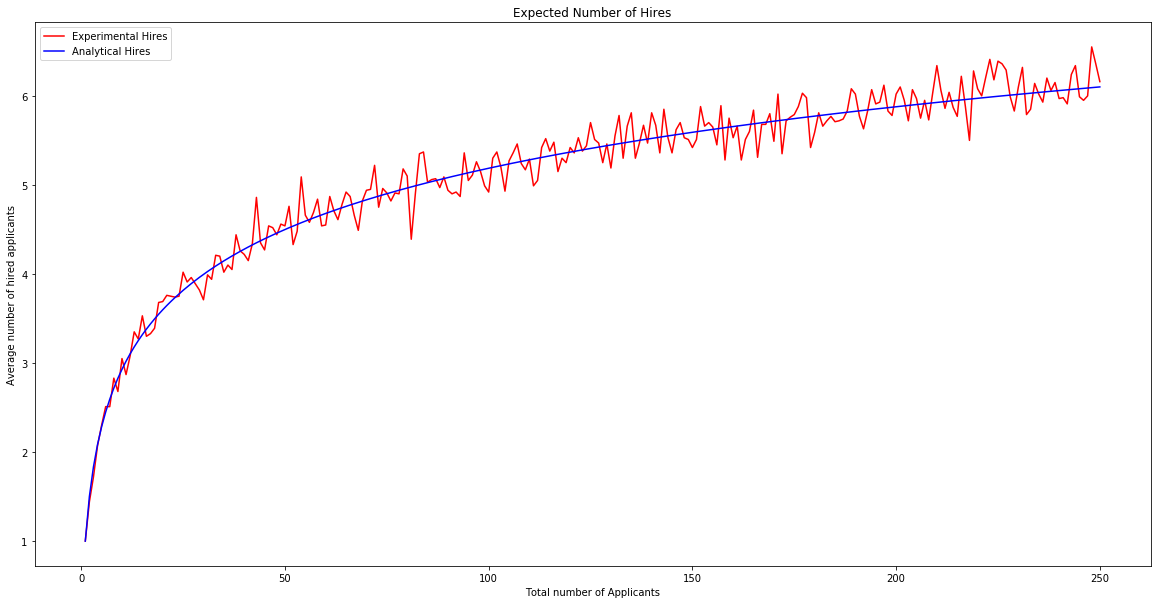

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

#3 empty lists we will append our values into
experimental = []
analytical = []
total = []


# for loop that runs over both experimental and analytical hires and finds their values
for i in range(1,251):
    experimental.append(experimental_hires(i))
    analytical.append(analytical_hires(i))
    total.append(i)
    
    
#comparitive plots 
def compare_plot():
    plt.figure(figsize=(20, 10))
    plt.plot(total, experimental, color = 'red', label = 'Experimental Hires')
    plt.plot(total, analytical, color = 'blue', label = 'Analytical Hires')
    plt.title('Expected Number of Hires')
    plt.xlabel('Total number of Applicants')
    plt.ylabel('Average number of hired applicants')
    plt.legend()
    plt.show
    
    
compare_plot()

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

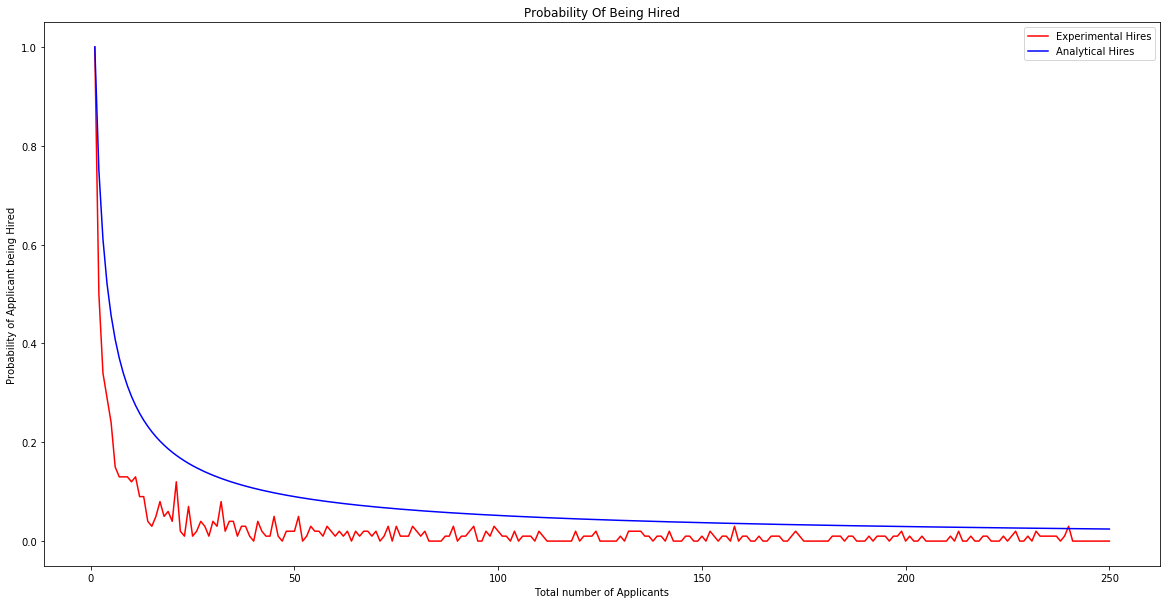

In [61]:
#first we must have codes that output probabilities

def experimental_hires_two(N):
    total = 100
    average = []
    
    for i in range(total):
        
        applicants = random.sample(range(N), N)
        
        average.append(hire_assistant(applicants))
        
    return (average.count(1)/total)


experimental_2 = []
analytical_2 = []
total_2 = []


# for loop that runs over both experimental and analytical hires and finds their values
for i in range(1,251):
    experimental_2.append(experimental_hires_two(i))
    analytical_2.append(analytical_hires(i)/i)
    total_2.append(i)
    
    
#comparitive plots 
def compare_plot_2():
    plt.figure(figsize=(20, 10))
    plt.plot(total_2, experimental_2, color = 'red', label = 'Experimental Hires')
    plt.plot(total_2, analytical_2, color = 'blue', label = 'Analytical Hires')
    plt.title('Probability Of Being Hired')
    plt.xlabel('Total number of Applicants')
    plt.ylabel('Probability of Applicant being Hired')
    plt.legend()
    plt.show
    
    
compare_plot_2()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

This would not be appropriate. The reason is that we have distinct values for x and y. X being number of partygoers and Y being the index of their hat. The appropriate way would be to generate a list from 1 to the number of total partygoers (and assuming that each partygoer is associated with their uniquely indexed hat) and then shuffling the list so therefore losing the arrangment of hats.



## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 would be the most approrpiate way of handling this. The reason is that it does exactly what I discussed in Q1. It generates a list of partygoers and assigns a unique hat to them (and thus no repetitions) and then shuffles this list to mimic the order of the hats being lost.

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [73]:
def hat_check(N):
    
    correct_hats = 0
    
    #using command 2
    hat_list = random.sample(range(N),N) 
    np.random.shuffle(hat_list) 
    
    for i in range(len(hat_list)):
        if i == hat_list[i]:
            correct_hats += 1
            
    return correct_hats

hat_check(100)

0

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

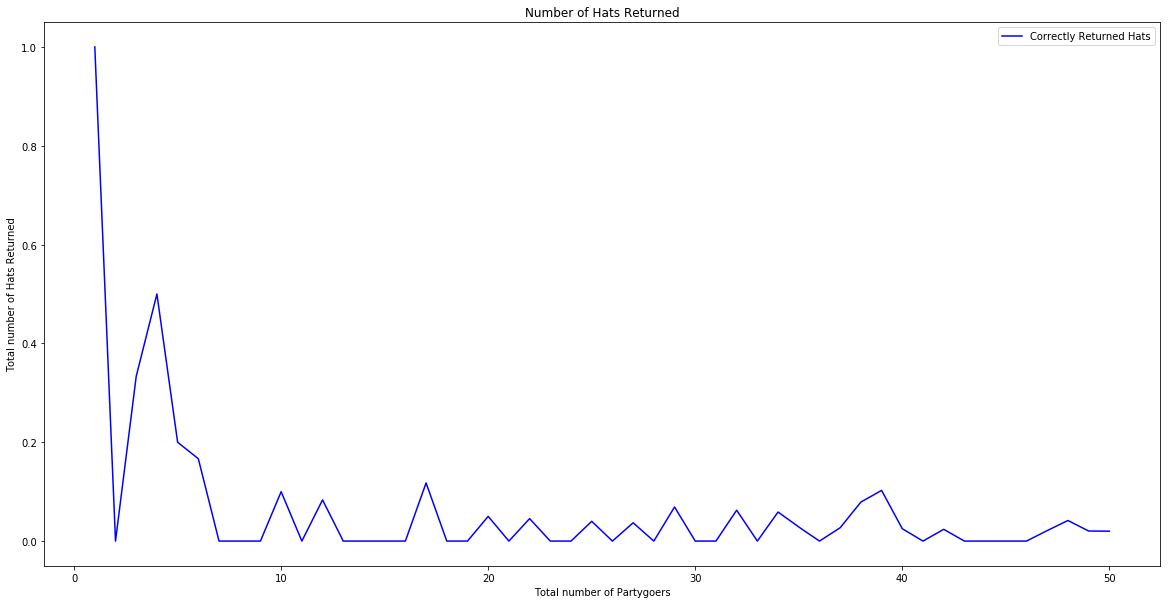

In [76]:
correct_hats_2 = []
partygoers = []

#For loop evaluates the respective functions and adds their values to each list
for i in range(1,51):
    correct_hats_2.append(hat_check(i)/i)
    partygoers.append(i)
 

def compare_plot_3():
    plt.figure(figsize=(20, 10))
    plt.plot(partygoers, correct_hats_2, color = 'blue', label = 'Correctly Returned Hats')
    plt.title('Number of Hats Returned')
    plt.xlabel('Total number of Partygoers')
    plt.ylabel('Total number of Hats Returned')
    plt.legend()
    plt.show
    
    
compare_plot_3()



## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE